In [1]:
import tensorflow as tf

## Describe the dataset

In [2]:
mnist_df = tf.keras.datasets.mnist
(X_train, y_train) , (X_test, y_test) = mnist_df.load_data()

In [3]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [8]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)


X train shape:  (60000, 28, 28)
y train shape:  (60000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


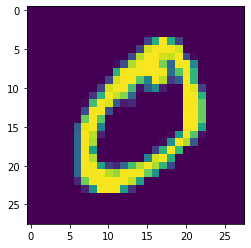

In [11]:
import matplotlib.pyplot as plt

#show second data point
plt.imshow(X_train[1]) 

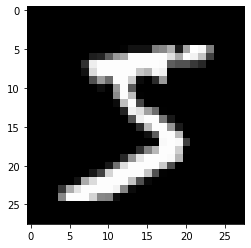

In [12]:
#plot in gray scale
plt.imshow(X_train[0],cmap='gray');

In [13]:
# Normalize x_train and x_test
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Apply TF model

In [16]:
#Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [18]:
#Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4816 - accuracy: 0.8602 - val_loss: 0.1397 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1513 - accuracy: 0.9543 - val_loss: 0.0968 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1031 - accuracy: 0.9682 - val_loss: 0.0834 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0785 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9772 - val_loss: 0.0720 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.0668 - val_accuracy:

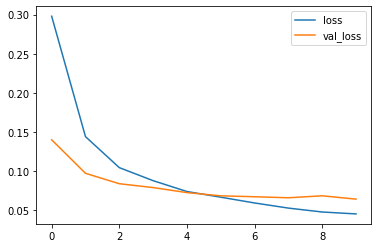

In [19]:
#Plot loss per ietration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

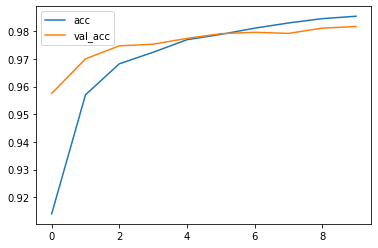

In [20]:
#Plot the accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [21]:
#Calculate accuracy score. Accuracy: 0.9817
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9817


[0.06368955224752426, 0.9817000031471252]

Confusion matrix, without normalization
[[ 972    0    2    1    1    1    1    1    1    0]
 [   0 1127    2    1    0    1    3    0    1    0]
 [   6    1 1013    2    1    0    2    4    3    0]
 [   0    0    2  993    0    6    0    4    1    4]
 [   2    0    3    1  964    1    3    2    0    6]
 [   2    0    0    4    1  879    2    1    3    0]
 [   3    3    0    1    2    5  944    0    0    0]
 [   1    4   11    3    0    0    0 1001    1    7]
 [   2    1    5    5    3    3    5    2  944    4]
 [   2    5    0    3   10    3    0    5    1  980]]


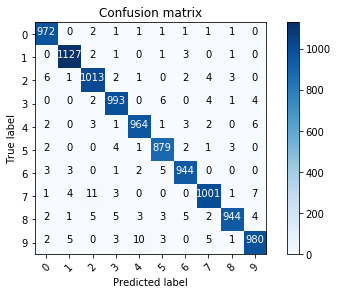

In [23]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10)))

## Missclassified examples

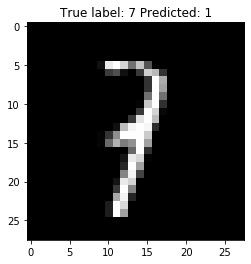

In [27]:
misclassified_idx = np.where( y_pred != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));

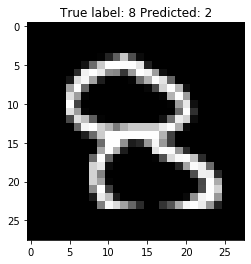

In [28]:
misclassified_idx = np.where( y_pred != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));

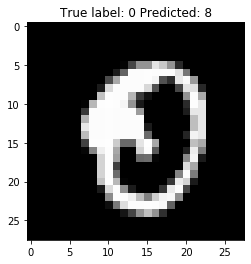

In [29]:
misclassified_idx = np.where( y_pred != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));